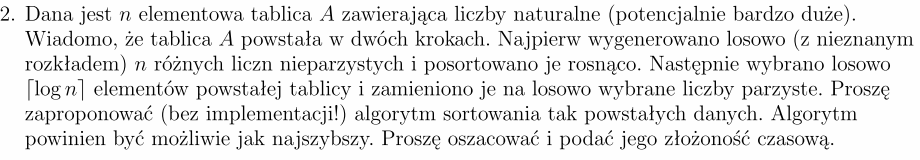

### Omówienie algortmu

Ponieważ wiemy, że liczby nieparzyste w tablicy $ A $ są posortowane rosnąco, wystarczy przejść liniowo po tablicy $ A $ i odfiltrować z niej liczby parzyste, przepisując je do pomocniczej tablicy. W następnym kroku, sortujemy pomocniczą tablicę dowolnym algorytmem sortowania o złożoność $ O(n \cdot log(n)) $ lub nawet $ O(n^2) $, bo mamy tylko $ \left \lceil{log(n)}\right \rceil  $ różnych wartości, więc dla algorytmu sortowania o złożoności kwadratowej, otrzymamy złożoność $ O(\left \lceil{log(n)}\right \rceil^2) $. Ponieważ i tak nie jest możliwe w rozsądnym czasie przepisanie wartości parzystych w dobre miejsca tablicy $ A $, najlepiej utworzyć również tablicę pomocniczą na wartości nieparzyste i je w niej umieszczać, podczas odfiltrowywania wartości parzystych (łącznie obie tablice zajmą $ O(n) $ miejsca). Ostatnim krokiem jest liniowe przejście przez obie tablice (bo wiemy, że liczby nieparzyste są już posortowane) i przepisywanie kolejnych najmniejszych wartości spowrotem do tablicy $ A $. Złożoność obliczeniowa tego algorytmu wynosi $ O(cn + \left \lceil{log(n)}\right \rceil^2) = O(cn) = O(n) $, gdzie $ c $ jest pewną stałą, zależną od tego, ile razy przechodzimy liniowo przez wszystkie elementy tablicy $ A $.

### Implementacja algorytmu

In [1]:
def arr_sort(arr):
    if len(arr) < 2: return
    # Filter an array by moving values to proper temporary arrays
    even_nums = []
    odd_nums = []
    for val in arr:
        # If is odd, append to odd_nums
        if val % 2: odd_nums.append(val)
         # If is even, append to even_nums
        else: even_nums.append(val)
            
    # Sort even numbers using Insertion Sort (we know there are only
    # ceil(log(n)) such numbers so Insertion Sort is enough we need)
    insertion_sort(even_nums)
    
    # Rewrite both arrays to the initial array in a right order
    rewrite_values(even_nums, odd_nums, arr)
    
    
def rewrite_values(source1, source2, target):
    i = j = 0
    k = 0  # An index of a target array
    
    while i < len(source1) and j < len(source2):
        if source1[i] < source2[j]:
            target[k] = source1[i]
            i += 1
        else:
            target[k] = source2[j]
            j += 1
        k += 1
        
    # Move the remaining values (one of source arrays will still
    # have some values to rewrite)
    for i in range(i, len(source1)):
        target[k] = source1[i]
        k += 1
    for j in range(j, len(source2)):
        target[k] = source2[j]
        k += 1
        
    
def insertion_sort(arr):
    for i in range(1, len(arr)):
        j = i-1
        temp = arr[i]
        
        while j >= 0 and temp < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        
        arr[j+1] = temp

Kilka testów

In [2]:
import random
import math

def test(n):
    arr = sorted(random.randrange(1, 100_000, 2) for _ in range(n))
    # Replace ceil(log(n)) values with random even numbers
    replaced_indices = set()
    for _ in range(math.ceil(math.log(n, 2))):
        while True:
            idx = random.randrange(n)
            if idx not in replaced_indices:
                replaced_indices.add(idx)
                arr[idx] = random.randrange(0, 100_000, 2)
                break

    print('Repalced values indices:', replaced_indices, sep='\n', end='\n\n')
    print('Input arr:', arr, sep='\n', end='\n\n')
    expected = sorted(arr)
    arr_sort(arr)
    print('After sorting:', arr, sep='\n', end='\n\n')
    print('Is correct?', expected == arr)

In [3]:
test(random.randint(1, 100))

Repalced values indices:
{0, 12, 6, 14}

Input arr:
[82596, 12045, 15491, 19399, 29413, 34405, 83512, 50549, 56043, 56051, 64101, 66153, 18890, 83809, 33306]

After sorting:
[12045, 15491, 18890, 19399, 29413, 33306, 34405, 50549, 56043, 56051, 64101, 66153, 82596, 83512, 83809]

Is correct? True
